# Outlier Detection and Diabetes Prediction on the Pima Indians Dataset

**Notebook Objective**: This notebook presents a thorough workflow to preprocess, clean, and analyze the Pima Indians Diabetes dataset. We focus on outlier detection and removal, followed by building classification models to predict diabetes. Each section includes both theoretical background (why we perform certain steps) and practical implementation in Python.

## 1. Loading the Dataset

We begin by describing the dataset we will use:

- The **Pima Indians Diabetes Dataset** is a widely used medical dataset for machine learning.
- It contains various biological and demographic variables for female patients of Pima Indian heritage.
- The goal is to predict the presence of diabetes (`Outcome`: 1 = diabetes, 0 = no diabetes).

**Features**:

1. **Pregnancies**: Number of pregnancies.
2. **Glucose**: Plasma glucose concentration (2 hours in an oral glucose tolerance test).
3. **BloodPressure**: Diastolic blood pressure (mm Hg).
4. **SkinThickness**: Triceps skinfold thickness (mm).
5. **Insulin**: 2-Hour serum insulin (µIU/ml).
6. **BMI**: Body mass index (weight in kg/(height in m)^2).
7. **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history).
8. **Age**: Age in years.
9. **Outcome**: Class variable (0 or 1).

Ensure that the file `pima-indians-diabetes.csv` is located in the working directory of this notebook.

In [31]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv(r'C:\Users\macma\PycharmProjects\PimaIndiandsDiabetes\notebooks\data\diabetes.csv')

# Display the first few rows to understand data structure
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Exploratory Data Analysis (EDA)

Before performing any cleaning or modeling, we need to understand the data:

1. Check data types and identify missing or anomalous values.
2. Calculate descriptive statistics (mean, standard deviation, min, max, quartiles) for each feature.
3. Identify zeros in columns where a value of zero is not medically plausible (e.g., glucose, blood pressure, BMI), since zeros often represent missing measurements.

These steps help us determine how to handle missing or problematic data.

In [32]:
import numpy as np

# General information about columns and non-null counts
print("General information:")
print(df.info(verbose=True))

# Descriptive statistics for numerical features
print("\nDescriptive statistics:")
print(df.describe())

# Check for zeros in columns where zero is not a valid clinical value
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    zero_count = (df[col] == 0).sum()
    print(f"The column '{col}' contains {zero_count} zero values.")

print("\nTranspose of Descriptive statistics:")
df.describe().T

General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descriptive statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      6

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 3. Handling Missing Values

In many medical datasets, a value of zero is used to indicate that a measurement was not taken or is unavailable. However, medically speaking, a glucose level, blood pressure, or BMI of zero is not realistic. Therefore:

- We will replace zeros with the **median** of the corresponding column, computed over non-zero entries.
- The median is chosen because it is robust to existing outliers compared to the mean.

**Practical Approach**:
1. For each column where zero indicates missing data, compute the median of values that are non-zero.
2. Replace all zeros in that column with the computed median.

Let's implement this step.

#### First of all, to fill these Nan values the data distribution needs to be understood


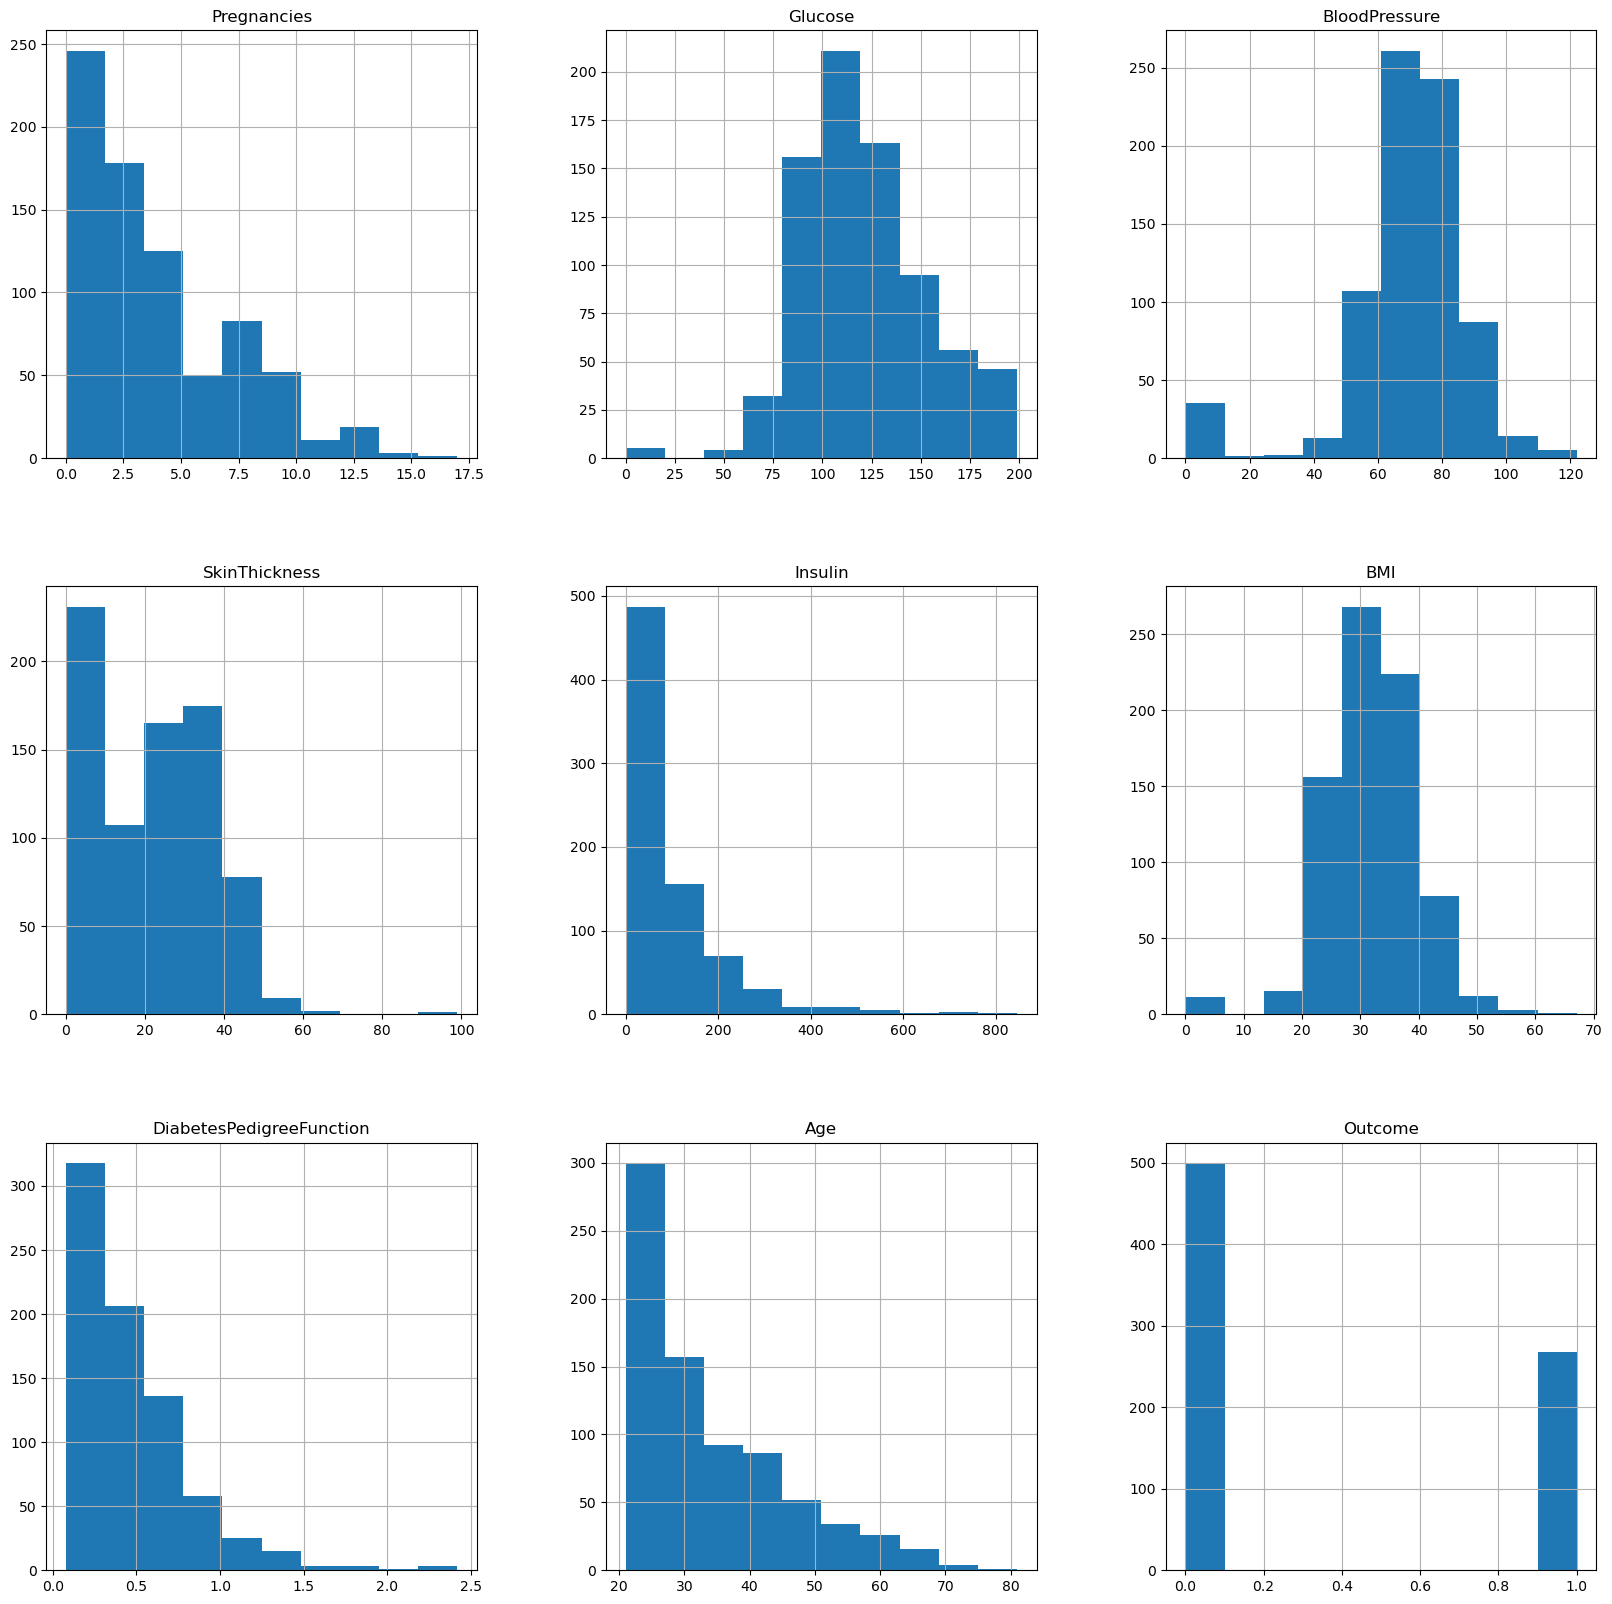

In [33]:
p = df.hist(figsize = (20,20))


In [34]:
# Create a copy of the DataFrame for imputation
df_imputed = df.copy()

# Replace zeros with the median for specified columns
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median_value = df_imputed[df_imputed[col] != 0][col].median()
    df_imputed.loc[df_imputed[col] == 0, col] = median_value
    print(f"Column '{col}': replaced zeros with median value {median_value}")

# Verify that no zeros remain in those columns
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (df_imputed[col] == 0).sum()
    print(f"After imputation, column '{col}' has {zero_count} zero values.")

Column 'Glucose': replaced zeros with median value 117.0
Column 'BloodPressure': replaced zeros with median value 72.0
Column 'SkinThickness': replaced zeros with median value 29.0
Column 'Insulin': replaced zeros with median value 125.0
Column 'BMI': replaced zeros with median value 32.3
After imputation, column 'Glucose' has 0 zero values.
After imputation, column 'BloodPressure' has 0 zero values.
After imputation, column 'SkinThickness' has 0 zero values.
After imputation, column 'Insulin' has 0 zero values.
After imputation, column 'BMI' has 0 zero values.


#### Plotting after Nan removal


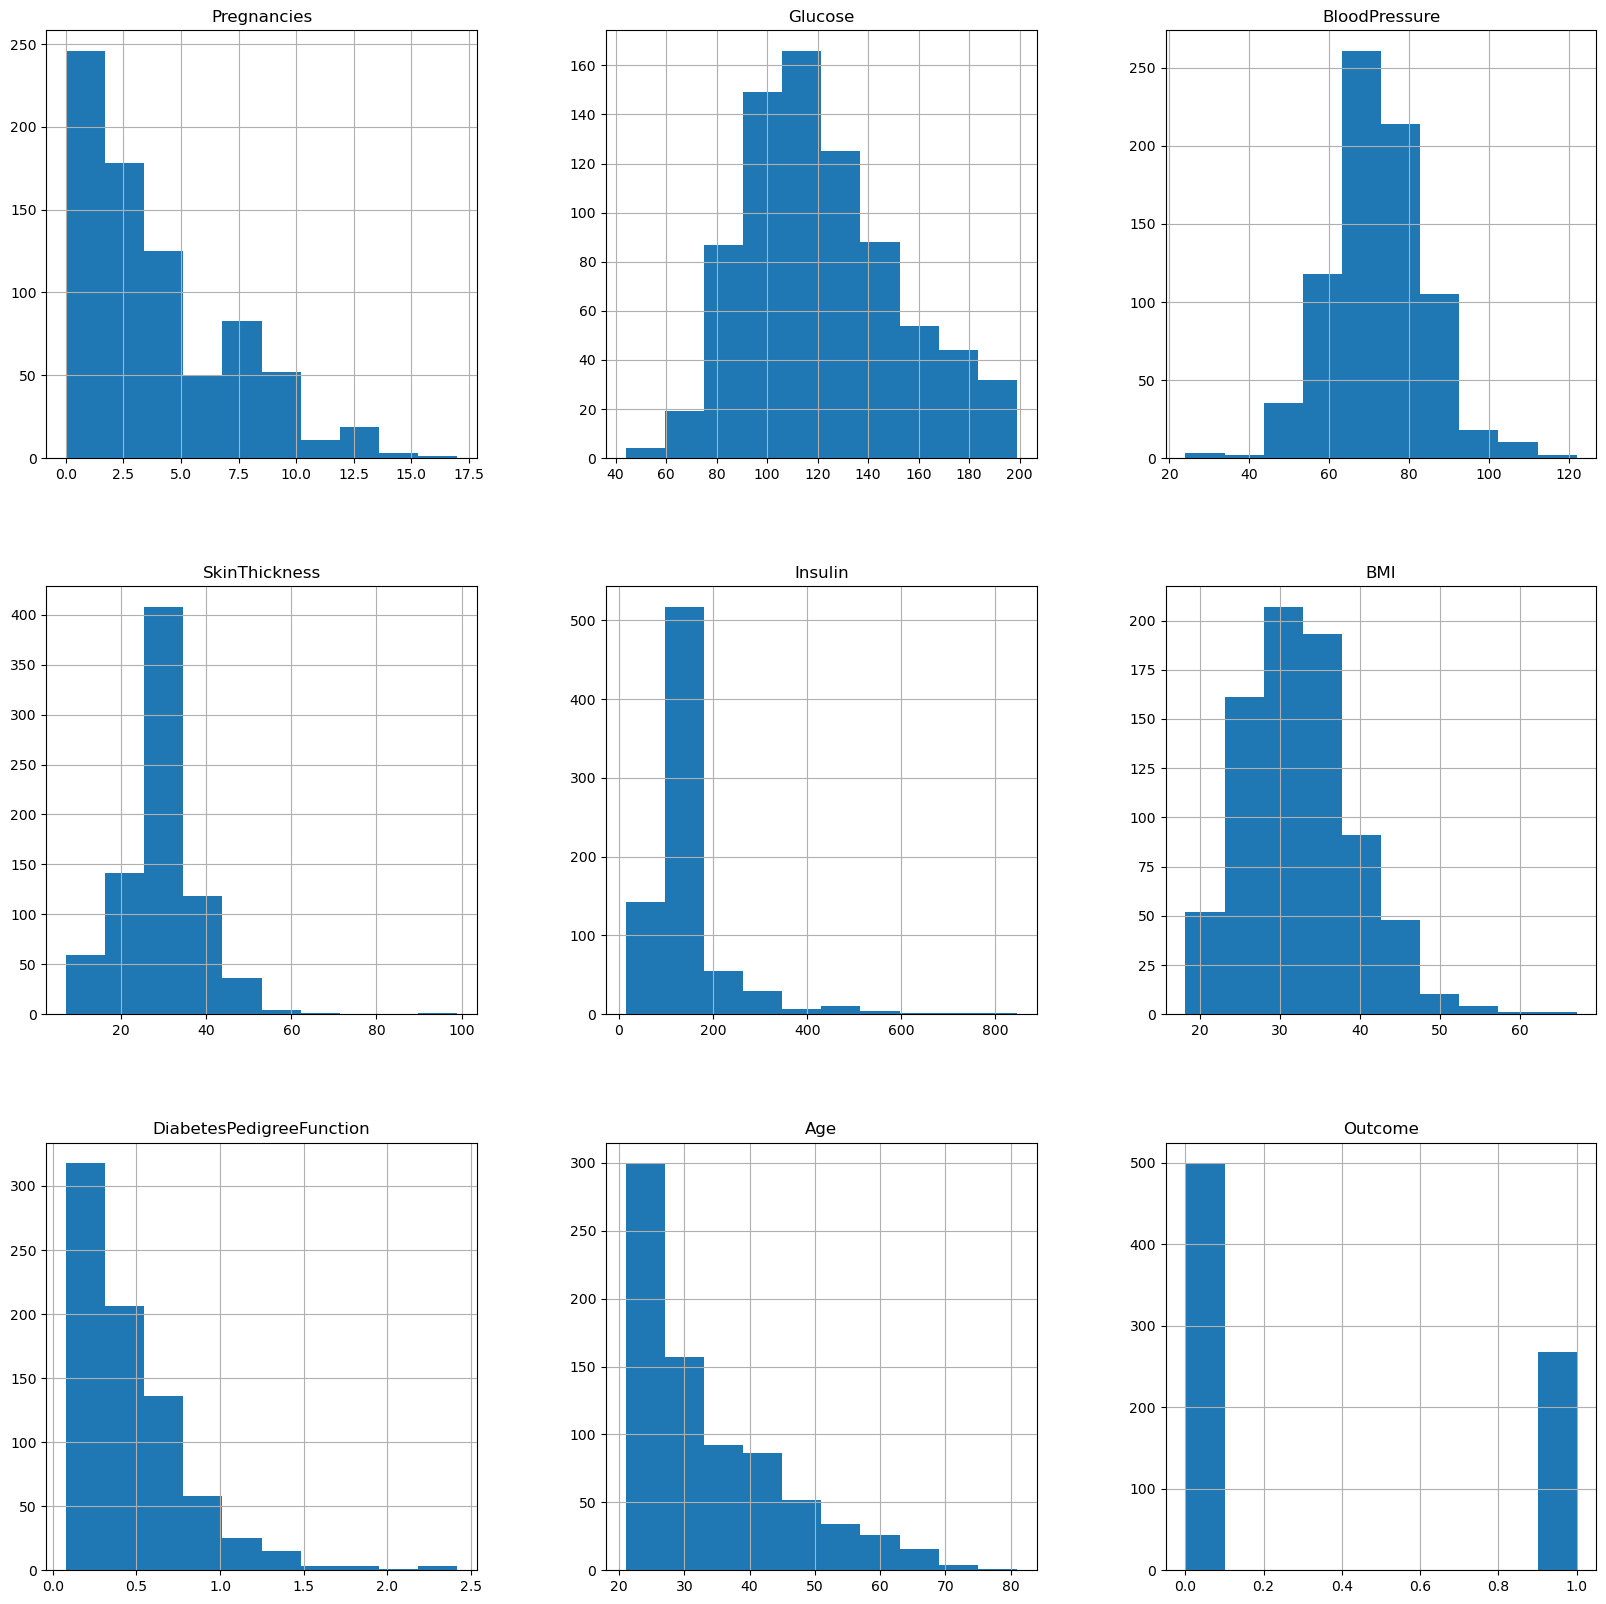

In [35]:
p = df_imputed.hist(figsize = (20,20))


## 4. Outliers and Detection Methods

### 4.1 What is an Outlier?

- An **outlier** is an observation that deviates significantly from other observations in a dataset.
- In medical data, outliers may result from measurement errors, data entry mistakes, or genuinely extreme patient conditions.
- Outliers can distort descriptive statistics and degrade the performance of many machine learning models by skewing decision boundaries.

### 4.2 Approaches for Detecting Outliers

Common techniques include:
- **Statistical methods**: e.g., the IQR (Interquartile Range) rule, z-score thresholds.
- **Model-based methods**: e.g., **Isolation Forest**, **Local Outlier Factor (LOF)**, or clustering-based approaches (e.g., DBSCAN).
- **Neural network-based methods**: e.g., autoencoders to reconstruct data and flag poorly reconstructed points as anomalies.

### 4.3 Why Isolation Forest?

Isolation Forest is an unsupervised algorithm that isolates anomalies based on the principle that anomalies are “few and different”:

1. **Isolation**: Randomly select a feature and then randomly select a split value between the feature’s minimum and maximum values.
2. **Tree construction**: Recursively split data points until every point is isolated in a tree structure.
3. **Path length**: Anomalies are isolated closer to the root because fewer splits are needed, resulting in shorter average path lengths.
4. **Anomaly score**: Compute an anomaly score based on the path length. By default in scikit-learn, a score of `-1` indicates an outlier and `1` indicates an inlier.

Isolation Forest is well-suited for datasets with multiple features and complex distributions and is scalable to large datasets.

In the next section, we will apply Isolation Forest to our imputed dataset.

## 5. Detecting and Removing Outliers

1. Select feature columns (exclude the target column).
2. Initialize and fit an Isolation Forest.
3. Use the predictions to label each observation as an outlier (`-1`) or inlier (`1`).
4. Remove rows labeled as outliers to obtain a cleaned dataset.

Let's implement these steps.

In [36]:
from sklearn.ensemble import IsolationForest

# Select feature columns (exclude the target 'Outcome')
features = df_imputed.drop(columns=['Outcome'])

# Initialize IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit and predict outliers (-1 = outlier, 1 = inlier)
outlier_labels = iso_forest.fit_predict(features)

# Add the outlier labels to the DataFrame
df_imputed['Outlier'] = outlier_labels

# Create a new DataFrame containing only inliers
df_clean = df_imputed[df_imputed['Outlier'] == 1].drop(columns=['Outlier']).reset_index(drop=True)

# Display sizes before and after outlier removal
print(f"Dataset size after imputation: {df_imputed.shape[0]}")
print(f"Dataset size after removing outliers: {df_clean.shape[0]}")

Dataset size after imputation: 768
Dataset size after removing outliers: 729


### 5.1 IsolationForest Parameters

- **n_estimators**: The number of base estimators in the ensemble (100 trees). More trees can improve stability but increase computation.
- **contamination**: The expected proportion of outliers in the data. We set this to 0.05 (5%), which is reasonable for medical data but can be tuned.
- **random_state**: Ensures reproducible results.

Once outliers are labeled, we filter them out to proceed with a cleaner dataset.

## 6. Visualization Before and After Outlier Removal

To understand how outlier removal affects data distributions, we will plot histograms of key features before and after cleaning. We choose `Glucose`, `BMI`, and `Age` for visualization.

Plotting these side by side reveals how the presence of outliers extends distribution tails.

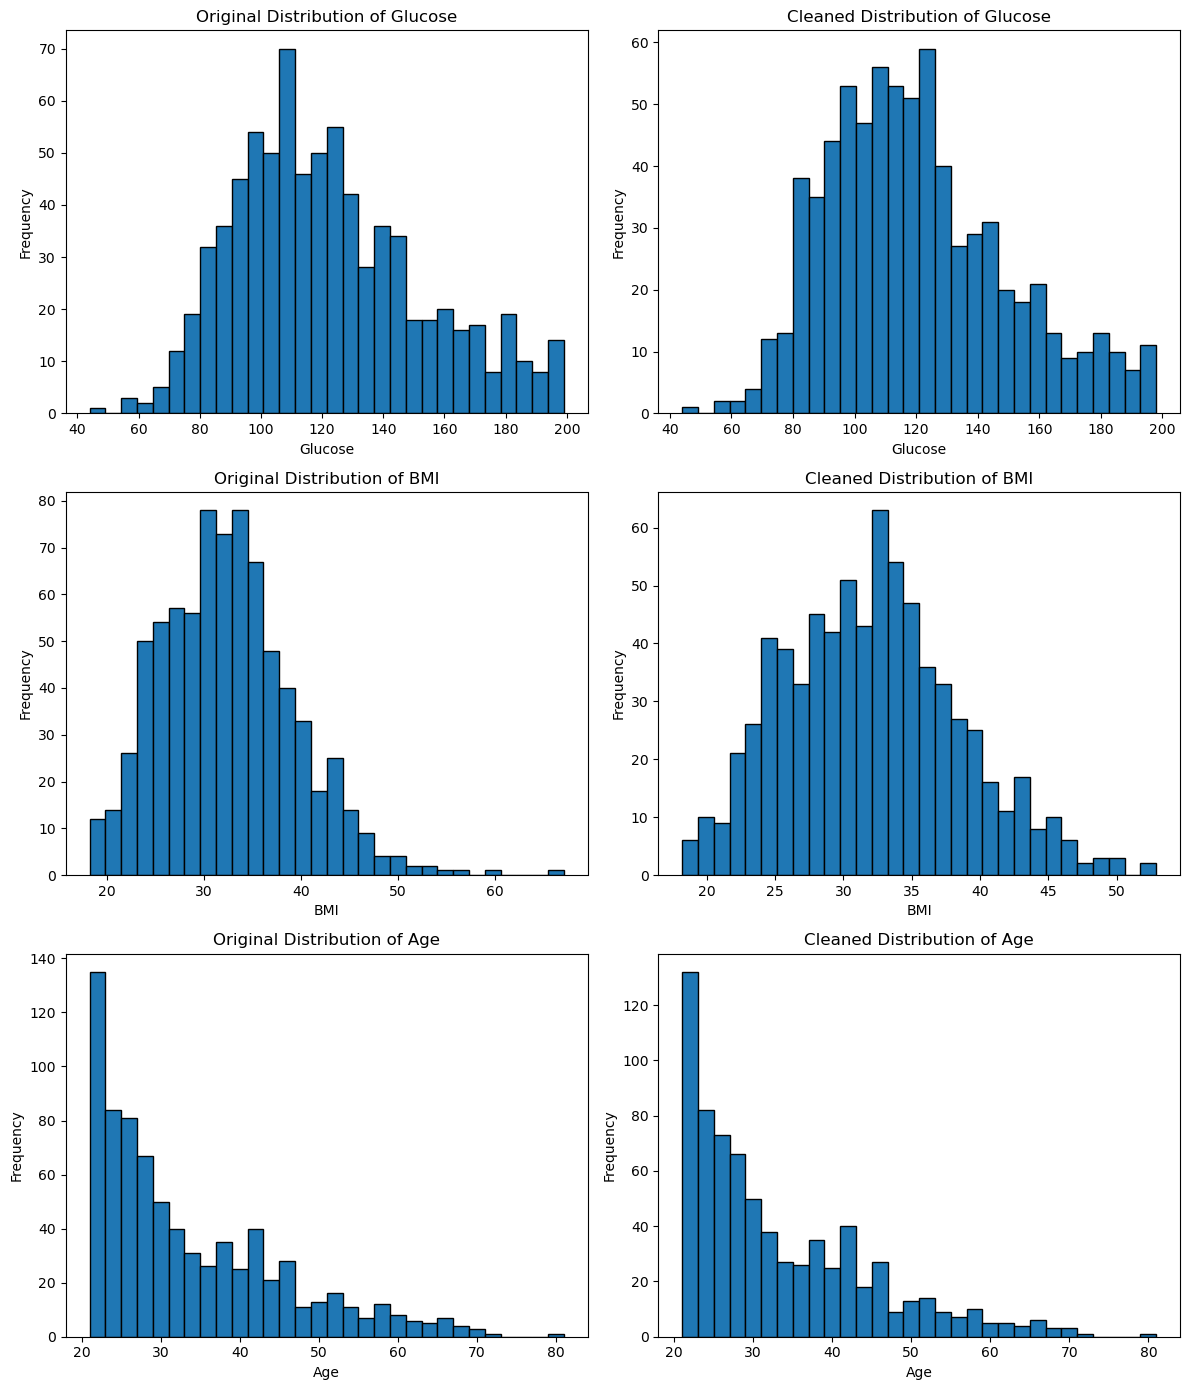

In [37]:
import matplotlib.pyplot as plt

# Features to visualize
features_to_plot = ['Glucose', 'BMI', 'Age']
fig, axes = plt.subplots(len(features_to_plot), 2, figsize=(12, 14))

for i, col in enumerate(features_to_plot):
    # Histogram before outlier removal
    axes[i, 0].hist(df_imputed[col], bins=30, edgecolor='k')
    axes[i, 0].set_title(f'Original Distribution of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Histogram after outlier removal
    axes[i, 1].hist(df_clean[col], bins=30, edgecolor='k')
    axes[i, 1].set_title(f'Cleaned Distribution of {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 7. Data Preparation for Classification

At this point, we have two versions of our dataset:
1. **Imputed dataset without outlier removal** (`df_imputed`), which has no zero values in specific columns but still may contain outliers.
2. **Cleaned dataset** (`df_clean`), with outliers removed.

For both datasets, we will:
- Separate features (`X`) and target (`y`).
- Split into training and test sets.
- Train a Random Forest classifier.
- Evaluate performance.

**Why Random Forest?**

- Random Forest is an ensemble of decision trees that uses bootstrap sampling and random feature selection to reduce overfitting and improve generalization.
- It handles non-linear feature interactions well and is robust to noisy data.

Below, we prepare data splits for both datasets.

In [38]:
from sklearn.model_selection import train_test_split

# Prepare uncleaned dataset (imputed but not outlier-removed)
X_unclean = df_imputed.drop(columns=['Outcome', 'Outlier'], errors='ignore')
y_unclean = df_imputed['Outcome']

# Prepare cleaned dataset (outliers removed)
X_clean = df_clean.drop(columns=['Outcome'])
y_clean = df_clean['Outcome']

# Train-test split for uncleaned data
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(
    X_unclean, y_unclean, test_size=0.2, random_state=42, stratify=y_unclean
)

# Train-test split for cleaned data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

print(f"Uncleaned train shape: {X_train_u.shape}, test shape: {X_test_u.shape}")
print(f"Cleaned train shape: {X_train_c.shape}, test shape: {X_test_c.shape}")

Uncleaned train shape: (614, 8), test shape: (154, 8)
Cleaned train shape: (583, 8), test shape: (146, 8)


## 8. Theory of the Random Forest Model

The **Random Forest** classifier builds an ensemble of decision trees. Key concepts:

1. **Bootstrap Aggregation (Bagging)**: For each tree, a bootstrap sample (sampling with replacement) of the training data is used. This introduces variation between trees.
2. **Random Feature Selection**: At each split, a random subset of features is considered, further decorrelating the trees.
3. **Ensemble Prediction**: For classification, each tree votes on the class, and the final prediction is the majority vote.

**Advantages**:
- Reduces overfitting compared to a single decision tree.
- Captures complex, non-linear relationships.
- Provides feature importance scores, which can be useful for interpretation.

We will train and evaluate models on both the uncleaned and cleaned datasets to observe the impact of outlier removal.

## 9. Training and Evaluation on the Uncleaned Dataset

### 9.1 Training

We train a `RandomForestClassifier` on the imputed dataset (which may still contain outliers), then generate predictions on the test set.

### 9.2 Evaluation Metrics

We use the following metrics:
- **Accuracy**: Overall fraction of correct predictions.
- **Precision**: True Positives / (True Positives + False Positives). Reflects how many predicted positives are actual positives.
- **Recall (Sensitivity)**: True Positives / (True Positives + False Negatives). Crucial in medical diagnosis to minimize false negatives.
- **F1-Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: Matrix of True Positives, True Negatives, False Positives, and False Negatives.

These metrics help us understand model performance in a medical context where false negatives (failing to detect diabetic individuals) are particularly problematic.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize the classifier for the uncleaned data
rf_unclean = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_unclean.fit(X_train_u, y_train_u)

# Predict on the test set
y_pred_u = rf_unclean.predict(X_test_u)

# Compute metrics
acc_u = accuracy_score(y_test_u, y_pred_u)
prec_u = precision_score(y_test_u, y_pred_u, zero_division=0)
rec_u = recall_score(y_test_u, y_pred_u, zero_division=0)
f1_u = f1_score(y_test_u, y_pred_u, zero_division=0)

print("**Performance on Uncleaned Data:**")
print(f"Accuracy: {acc_u:.4f}")
print(f"Precision: {prec_u:.4f}")
print(f"Recall: {rec_u:.4f}")
print(f"F1-Score: {f1_u:.4f}\n")

print("Classification Report (Uncleaned):")
print(classification_report(y_test_u, y_pred_u))

print("Confusion Matrix (Uncleaned):")
print(confusion_matrix(y_test_u, y_pred_u))

**Performance on Uncleaned Data:**
Accuracy: 0.7792
Precision: 0.7273
Recall: 0.5926
F1-Score: 0.6531

Classification Report (Uncleaned):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

Confusion Matrix (Uncleaned):
[[88 12]
 [22 32]]


## 10. Training and Evaluation on the Cleaned Dataset

Now we repeat the same training and evaluation steps using the dataset from which we have removed outliers. This allows us to directly compare performance metrics and understand how outlier removal impacts model effectiveness.

In [40]:
# Initialize the classifier for the cleaned data
rf_clean = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clean.fit(X_train_c, y_train_c)

# Predict on the test set
y_pred_c = rf_clean.predict(X_test_c)

# Compute metrics
acc_c = accuracy_score(y_test_c, y_pred_c)
prec_c = precision_score(y_test_c, y_pred_c, zero_division=0)
rec_c = recall_score(y_test_c, y_pred_c, zero_division=0)
f1_c = f1_score(y_test_c, y_pred_c, zero_division=0)

print("**Performance on Cleaned Data:**")
print(f"Accuracy: {acc_c:.4f}")
print(f"Precision: {prec_c:.4f}")
print(f"Recall: {rec_c:.4f}")
print(f"F1-Score: {f1_c:.4f}\n")

print("Classification Report (Cleaned):")
print(classification_report(y_test_c, y_pred_c))

print("Confusion Matrix (Cleaned):")
print(confusion_matrix(y_test_c, y_pred_c))

**Performance on Cleaned Data:**
Accuracy: 0.7808
Precision: 0.6905
Recall: 0.6042
F1-Score: 0.6444

Classification Report (Cleaned):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        98
           1       0.69      0.60      0.64        48

    accuracy                           0.78       146
   macro avg       0.75      0.74      0.74       146
weighted avg       0.78      0.78      0.78       146

Confusion Matrix (Cleaned):
[[85 13]
 [19 29]]


## 11. Detailed Comparison of Metrics

We present a comparison table for key metrics between the uncleaned and cleaned models:

- Improvement or decline in each metric (Accuracy, Precision, Recall, F1-Score).
- Qualitative analysis to determine if outlier removal reduced classification errors, especially false negatives.

In [41]:
import pandas as pd

# Create a DataFrame comparing metrics
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Uncleaned': [acc_u, prec_u, rec_u, f1_u],
    'Cleaned': [acc_c, prec_c, rec_c, f1_c]
})

# Calculate difference
comparison_df['Difference (Cleaned - Uncleaned)'] = comparison_df['Cleaned'] - comparison_df['Uncleaned']
comparison_df

,Metric,Uncleaned,Cleaned,Difference (Cleaned - Uncleaned)
0,Accuracy,0.779221,0.780822,0.001601
1,Precision,0.727273,0.690476,-0.036797
2,Recall,0.592593,0.604167,0.011574
3,F1-Score,0.653061,0.644444,-0.008617


## 12. Feature Importance (Cleaned Model)

Random Forests provide a measure of feature importance, indicating which features contribute most to the model’s decisions. A higher importance means the feature is more useful for splitting nodes and improving accuracy. Let's visualize the top contributing features.

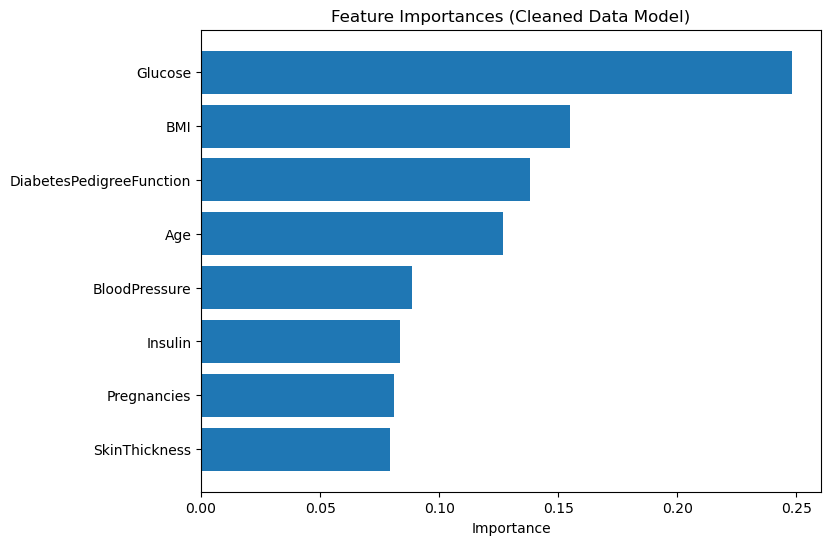

In [42]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf_clean.feature_importances_
feature_names = X_clean.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.barh(feature_names[indices], importances[indices])
plt.xlabel('Importance')
plt.title('Feature Importances (Cleaned Data Model)')
plt.gca().invert_yaxis()
plt.show()

## 13. Conclusions

In this notebook, we performed a comprehensive analysis of the Pima Indians Diabetes dataset:

1. **Data Loading and Inspection**: We loaded the dataset and inspected basic properties.
2. **Missing Value Handling**: We replaced clinically implausible zeros with medians to handle missing data.
3. **Outlier Theory and Detection**: We discussed outliers, described the Isolation Forest algorithm, and applied it to detect and remove outliers.
4. **Visualization**: We visualized the distributions of key features before and after removing outliers.
5. **Machine Learning Workflow**:
   - Split each dataset (imputed-only vs. cleaned) into training and test sets.
   - Trained Random Forest classifiers on both datasets.
   - Evaluated performance using metrics important in a medical context.
6. **Performance Comparison**: We compared metrics to assess the impact of outlier removal.
7. **Feature Importance Analysis**: We identified which features were most influential for predicting diabetes.

From this experiment, we can evaluate whether removing outliers improved overall model performance and reduced critical errors like false negatives. This process is vital in medical applications, where reliable predictions are essential.

**Next Steps**: Future work could include exploring additional models (e.g., XGBoost, Support Vector Machines), tuning hyperparameters, or engineering new features to further improve prediction accuracy. Additionally, alternative outlier detection methods could be tested to optimize data cleaning.